### **Tipos de cálculos:**

- Rate of Change: P(hoy)/P(hoy – n días)-1

- RSI (ver librería Análisis Técnico)

- Moving Average

- Standard Deviation

- Beta

In [2]:
import pandas as pd
import numpy as np
import app_functions as af
import plots as pl

In [3]:
prices_df = pd.read_csv('complete_prices.csv',index_col=0)

In [24]:
prices_df.shape

(8410, 1566)

<AxesSubplot: >

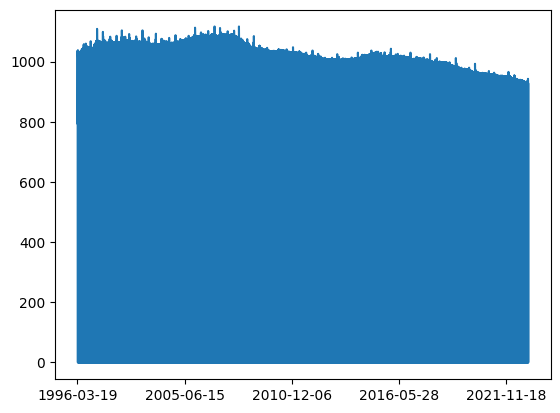

In [4]:
prices_df = prices_df.sort_index()#.fillna(method='ffill',limit=2)
prices_df.notna().sum(axis=1).plot()

### Rate of change / Momentum
---

In [ ]:
pct_change_df = prices_df.pct_change(1)

In [ ]:
prices_df.iat[-1,0] / prices_df.iat[-4,0] -1

In [ ]:
prices_df.iat[-5,0]

### Filter function
---

In [1]:
import json

with open('constituents_filter.json','r') as file:
    consts_filter = json.load(file)
with open('daily_constituents_filter.json','r') as file:
    daily_consts_filter = json.load(file)


In [7]:
def rank_data(pivoted_df, n_quantiles, type_=['alto','bajo'], as_df=True, filter_dict=None):

    labels = range(1,n_quantiles+1) if type_=='bajo' else (range(n_quantiles,0,-1) if type_ == 'alto' else 'null')

    if as_df:
        ranks_list = []
        for row in (arr := pivoted_df.values):
            try:
                ranks_list.append(pd.qcut(row,n_quantiles,duplicates='drop',labels=labels))
            except Exception as x:
                return np.where(arr==row)
        return pd.DataFrame(np.array(ranks_list), index=pivoted_df.index, columns=pivoted_df.columns)
    
    ranks_dict = {}
    for date, values in pivoted_df.T.items():
        try:
            constituents = filter_dict[date]
        except KeyError:
            pass
            continue
        row = values.loc[constituents]
        try:
            ranks_dict[date] = pd.qcut(row,n_quantiles,duplicates='drop',labels=False)
        except ValueError:
            print(f'failed to rank for {date}')
    return pd.DataFrame(ranks_dict).T

In [ ]:
tmp = pd.read_csv(r'C:\Users\hugo.perezdealbeniz\Desktop\Ranking DIP European Equities\ReutersEikon\data\pivoted_data\PCFperShare.csv', index_col=0).dropna(how='all',axis=1).dropna(how='all',axis=0)

In [ ]:
rank_data(tmp,10,'alto')

In [ ]:
tmp = pd.read_csv(prices_fp,index_col=0).pct_change().dropna(how='all',axis=1).dropna(how='all',axis=0)

In [5]:
pct_change_df = prices_df.pct_change(limit=1)#.pct_change(limit=2)#,fill_method='pad',limit=2)
tmp = pct_change_df.dropna(how='all',axis=0)

In [21]:
prices_df.tail(1000)

1COV.DE  1U1.DE   A2.MI  A3M.MC  AAAA.L^C21  AAH.AS^D08  \
2020-04-07    29.10  19.205  1.1930   2.408    0.190114         NaN   
2020-04-08    29.11  19.395  1.1730   2.478    0.188239         NaN   
2020-04-09    29.92  19.550  1.2025   2.492    0.217480         NaN   
2020-04-10      NaN     NaN     NaN     NaN         NaN         NaN   
2020-04-11      NaN     NaN     NaN     NaN         NaN         NaN   
...             ...     ...     ...     ...         ...         ...   
2022-12-28    36.94  11.560  1.2425   3.140         NaN         NaN   
2022-12-29    36.88  11.680  1.2675   3.200         NaN         NaN   
2022-12-30    36.55  11.600  1.2450   3.192         NaN         NaN   
2022-12-31      NaN     NaN     NaN     NaN         NaN         NaN   
2023-01-01    36.55  11.600  1.2450   3.192         NaN         NaN   

               AAK.ST      AAL.L  AALB.AS  AB.L^G07  ...     YAR.OL  YIT.HE  \
2020-04-07  14.895535  15.650841    23.38       NaN  ...  30.474387   4.326   
2020-04-08  14.594252  15.768272    25.00       NaN  ...  29.936711   4.258   
2020-04-09  14.684073  16.138301    25.34       NaN  ...        NaN   4.354   
2020-04-10        NaN        NaN      NaN       NaN  ...        NaN     NaN   
2020-04-11        NaN        NaN      NaN       NaN  ...        NaN     NaN   
...               ...        ...      ...       ...  ...        ...     ...   
2022-12-28  16.048986  37.212096    36.66       NaN  ...  40.770719   2.406   
2022-12-29  16.158492  36.791296    37.03       NaN  ...  41.034590   2.458   
2022-12-30  15.967163  36.583628    36.23       NaN  ...  41.071060   2.460   
2022-12-31        NaN        NaN      NaN       NaN  ...        NaN     NaN   
2023-01-01  15.967163  36.583628    36.23       NaN  ...  41.071060   2.460   

            YSO.LS  ZALG.DE  ZEL.MC^K15  ZIGGO.AS^L14  ZO1G.DE^A22  \
2020-04-07  0.6670    38.23         NaN           NaN        101.2   
2020-04-08  0.6715    38.48         NaN           NaN        102.2   
2020-04-09  0.6945    39.91         NaN           NaN         98.9   
2020-04-10     NaN      NaN         NaN           NaN          NaN   
2020-04-11     NaN      NaN         NaN           NaN          NaN   
...            ...      ...         ...           ...          ...   
2022-12-28  0.9270    32.89         NaN           NaN          NaN   
2022-12-29  0.9380    34.24         NaN           NaN          NaN   
2022-12-30  0.9350    33.11         NaN           NaN          NaN   
2022-12-31     NaN      NaN         NaN           NaN          NaN   
2023-01-01  0.9350    33.11         NaN           NaN          NaN   

            ZODC.PA^C18  ZOT.MC^E22      ZURN.S  
2020-04-07          NaN        6.20  299.139757  
2020-04-08          NaN        6.08  297.475425  
2020-04-09          NaN        6.15  302.684171  
2020-04-10          NaN         NaN         NaN  
2020-04-11          NaN         NaN         NaN  
...                 ...         ...         ...  
2022-12-28          NaN         NaN  453.830331  
2022-12-29          NaN         NaN  455.687107  
2022-12-30          NaN         NaN  447.084725  
2022-12-31          NaN         NaN         NaN  
2023-01-01          NaN         NaN  447.084725  

[1000 rows x 1566 columns]

In [13]:
ranked_df

1COV.DE 1U1.DE A2.MI A3M.MC AAAA.L^C21 AAH.AS^D08 AAK.ST AAL.L  \
2000-02-01     NaN    NaN     5    NaN        NaN          2    NaN   NaN   
2000-03-01     NaN    NaN     8    NaN        NaN          5    NaN   NaN   
2000-08-01     NaN    NaN     9    NaN        NaN          4    NaN     7   
2000-09-01     NaN    NaN     2    NaN        NaN         10    NaN     3   
2000-11-01     NaN    NaN     7    NaN        NaN          9    NaN     2   
...            ...    ...   ...    ...        ...        ...    ...   ...   
2022-07-01       9    NaN     2    NaN        NaN        NaN      2    10   
2022-08-01       7    NaN    10    NaN        NaN        NaN      7    10   
2022-09-01       5    NaN     5    NaN        NaN        NaN      7     8   
2022-11-01      10    NaN     7    NaN        NaN        NaN     10     1   
2022-12-01      10    NaN     6    NaN        NaN        NaN      2    10   

           AALB.AS AB.L^G07  ... YAR.OL YIT.HE YSO.LS ZALG.DE ZEL.MC^K15  \
2000-02-01     NaN        4  ...    NaN    NaN      4     NaN        NaN   
2000-03-01     NaN        1  ...    NaN    NaN      8     NaN        NaN   
2000-08-01     NaN        9  ...    NaN    NaN      7     NaN        NaN   
2000-09-01     NaN        5  ...    NaN    NaN      4     NaN        NaN   
2000-11-01     NaN        4  ...    NaN    NaN      6     NaN          6   
...            ...      ...  ...    ...    ...    ...     ...        ...   
2022-07-01       8      NaN  ...      5    NaN    NaN       1        NaN   
2022-08-01      10      NaN  ...      8    NaN    NaN       9        NaN   
2022-09-01       8      NaN  ...      4    NaN    NaN       9        NaN   
2022-11-01       3      NaN  ...      8    NaN    NaN       1        NaN   
2022-12-01       2      NaN  ...      9    NaN    NaN       1        NaN   

           ZIGGO.AS^L14 ZO1G.DE^A22 ZODC.PA^C18 ZOT.MC^E22 ZURN.S  
2000-02-01          NaN         NaN         NaN        NaN      5  
2000-03-01          NaN         NaN         NaN        NaN      5  
2000-08-01          NaN         NaN         NaN        NaN      6  
2000-09-01          NaN         NaN         NaN        NaN      9  
2000-11-01          NaN         NaN         NaN        NaN      3  
...                 ...         ...         ...        ...    ...  
2022-07-01          NaN         NaN         NaN        NaN      3  
2022-08-01          NaN         NaN         NaN        NaN      5  
2022-09-01          NaN         NaN         NaN        NaN      5  
2022-11-01          NaN         NaN         NaN        NaN      8  
2022-12-01          NaN         NaN         NaN        NaN      8  

[160 rows x 1546 columns]

In [12]:
rents_df.describe()

equiponderado     decil_1     decil_2     decil_3     decil_4  \
count     159.000000  159.000000  159.000000  159.000000  159.000000   
mean        0.002348    0.030030    0.018497    0.013236    0.010825   
std         0.054327    0.072336    0.055413    0.053456    0.051925   
min        -0.216562   -0.198914   -0.143666   -0.168452   -0.166533   
25%        -0.022396   -0.007719   -0.007868   -0.016748   -0.013649   
50%         0.009637    0.033658    0.024413    0.019265    0.021032   
75%         0.034806    0.065270    0.049272    0.043634    0.039732   
max         0.170754    0.338185    0.243320    0.243042    0.233000   

          decil_5     decil_6     decil_7     decil_8     decil_9    decil_10  
count  159.000000  159.000000  159.000000  159.000000  159.000000  159.000000  
mean     0.005176    0.000976   -0.002004   -0.007411   -0.011770   -0.034080  
std      0.050136    0.049140    0.051351    0.055784    0.058534    0.076041  
min     -0.191786   -0.217192   -0.237065   -0.287604   -0.279288   -0.396322  
25%     -0.016550   -0.021101   -0.021627   -0.031710   -0.034208   -0.060224  
50%      0.009880    0.008856    0.005646    0.002987   -0.000433   -0.019344  
75%      0.037438    0.032184    0.030362    0.027186    0.023742    0.014097  
max      0.175886    0.137418    0.129129    0.107901    0.089843    0.096955

In [23]:
tmp.tail(1000)

1COV.DE    1U1.DE     A2.MI    A3M.MC  AAAA.L^C21  AAH.AS^D08  \
2019-02-20  0.013911  0.016949  0.005390  0.031818   -0.024174         NaN   
2019-02-21  0.003528 -0.001149  0.006623  0.011454    0.001836         NaN   
2019-02-22  0.007812  0.005178 -0.006266  0.003049    0.004180         NaN   
2019-02-25 -0.031589  0.015455  0.001261 -0.007816   -0.022954         NaN   
2019-02-26 -0.025015 -0.015784 -0.006927 -0.017505    0.018403         NaN   
...              ...       ...       ...       ...         ...         ...   
2022-12-27  0.012386 -0.000873 -0.000794  0.005732         NaN         NaN   
2022-12-28  0.004350  0.009607 -0.012321 -0.005700         NaN         NaN   
2022-12-29 -0.001624  0.010381  0.020121  0.019108         NaN         NaN   
2022-12-30 -0.008948 -0.006849 -0.017751 -0.002500         NaN         NaN   
2023-01-01  0.000000  0.000000  0.000000  0.000000         NaN         NaN   

              AAK.ST     AAL.L   AALB.AS  AB.L^G07  ...    YAR.OL    YIT.HE  \
2019-02-20  0.027848  0.032891  0.004151       NaN  ...  0.018674  0.012452   
2019-02-21  0.001016 -0.014861  0.002862       NaN  ...  0.027730 -0.017975   
2019-02-22 -0.000919  0.033369  0.004756       NaN  ... -0.009405  0.004817   
2019-02-25 -0.006715 -0.006968  0.014200       NaN  ...  0.003608  0.001918   
2019-02-26 -0.003209  0.015619 -0.003423       NaN  ...  0.014535  0.008612   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-27  0.009393  0.000000 -0.001892       NaN  ...  0.006911 -0.007389   
2022-12-28  0.005195  0.008021 -0.007042       NaN  ... -0.013821 -0.004963   
2022-12-29  0.006823 -0.011308  0.010093       NaN  ...  0.006472  0.021613   
2022-12-30 -0.011841 -0.005644 -0.021604       NaN  ...  0.000889  0.000814   
2023-01-01  0.000000  0.000000  0.000000       NaN  ...  0.000000  0.000000   

              YSO.LS   ZALG.DE  ZEL.MC^K15  ZIGGO.AS^L14  ZO1G.DE^A22  \
2019-02-20 -0.001640  0.008249         NaN           NaN    -0.002547   
2019-02-21 -0.003834 -0.014504         NaN           NaN     0.000000   
2019-02-22 -0.001100 -0.012075         NaN           NaN     0.000000   
2019-02-25 -0.002752  0.041253         NaN           NaN     0.004255   
2019-02-26  0.020419 -0.011372         NaN           NaN     0.007627   
...              ...       ...         ...           ...          ...   
2022-12-27 -0.002128  0.007961         NaN           NaN          NaN   
2022-12-28 -0.011727 -0.000911         NaN           NaN          NaN   
2022-12-29  0.011866  0.041046         NaN           NaN          NaN   
2022-12-30 -0.003198 -0.033002         NaN           NaN          NaN   
2023-01-01  0.000000  0.000000         NaN           NaN          NaN   

            ZODC.PA^C18  ZOT.MC^E22    ZURN.S  
2019-02-20          NaN    0.005510  0.005295  
2019-02-21          NaN    0.011644  0.004102  
2019-02-22          NaN   -0.003385  0.002854  
2019-02-25          NaN   -0.001359  0.005039  
2019-02-26          NaN   -0.010204  0.002879  
...                 ...         ...       ...  
2022-12-27          NaN         NaN  0.006396  
2022-12-28          NaN         NaN -0.000872  
2022-12-29          NaN         NaN  0.004091  
2022-12-30          NaN         NaN -0.018878  
2023-01-01          NaN         NaN  0.000000  

[1000 rows x 1566 columns]

In [8]:
monthly_prices_fp = r'C:\Users\hugo.perezdealbeniz\Desktop\Ranking DIP European Equities\ReutersEikon\data\Final Data\PriceClose.csv'
daily_prices_fp = r'C:\Users\hugo.perezdealbeniz\Desktop\Ranking DIP European Equities\ReutersEikon\code_in_production\complete_prices.csv'
ranked_df = rank_data(tmp,10,'alto',as_df=False, filter_dict=daily_consts_filter)
rents_df = af.get_rents_df(ranked_df,daily_prices_fp,10)

KeyError: "['NELLY.ST', 'CDME.PA^D05', 'FNAC.PA', 'MNT.MI^K00', 'OEBZn.S^E00', 'TUI1n.DE', 'VANQ.L', 'SANDb.ST^E00', 'BPAN.IN^G00', 'BPSN.IN^L00', 'MPNG.PA^L15', 'RUKN.VX^L11', 'EQUT.PA^H05', 'STLAM.MI', 'EURO.ST^D03', 'SHCS.L', 'REIT.LU', 'EUAV.BR', 'BCU.MI', 'TELN.IN^E03', 'NDAFI.HE', 'ALNT.L^L15', 'CCFP.PA^H01', 'KVAER.OL^K20'] not in index"

In [19]:
len(consts_filter.keys())

277

In [38]:
ranked_df

1COV.DE  1U1.DE  A2.MI  A3M.MC  AAAA.L^C21  AAH.AS^D08  AAK.ST  \
2000-01-01      NaN     NaN    NaN     NaN         NaN         NaN     NaN   
2000-02-01      NaN     NaN    5.0     NaN         NaN         8.0     NaN   
2000-03-01      NaN     NaN    2.0     NaN         NaN         5.0     NaN   
2000-04-01      NaN     NaN    NaN     NaN         NaN         NaN     NaN   
2000-06-01      NaN     NaN    6.0     NaN         NaN         1.0     NaN   
...             ...     ...    ...     ...         ...         ...     ...   
2022-09-01      5.0     NaN    5.0     NaN         NaN         NaN     3.0   
2022-10-01      NaN     NaN    NaN     NaN         NaN         NaN     NaN   
2022-11-01      0.0     NaN    3.0     NaN         NaN         NaN     0.0   
2022-12-01      0.0     NaN    4.0     NaN         NaN         NaN     8.0   
2023-01-01      NaN     NaN    NaN     NaN         NaN         NaN     NaN   

            AAL.L  AALB.AS  AB.L^G07  ...  YAR.OL  YIT.HE  YSO.LS  ZALG.DE  \
2000-01-01    NaN      NaN       NaN  ...     NaN     NaN     NaN      NaN   
2000-02-01    NaN      NaN       6.0  ...     NaN     NaN     6.0      NaN   
2000-03-01    NaN      NaN       9.0  ...     NaN     NaN     2.0      NaN   
2000-04-01    NaN      NaN       NaN  ...     NaN     NaN     NaN      NaN   
2000-06-01    5.0      NaN       0.0  ...     NaN     NaN     4.0      NaN   
...           ...      ...       ...  ...     ...     ...     ...      ...   
2022-09-01    2.0      2.0       NaN  ...     6.0     NaN     NaN      1.0   
2022-10-01    NaN      NaN       NaN  ...     NaN     NaN     NaN      NaN   
2022-11-01    9.0      7.0       NaN  ...     2.0     NaN     NaN      9.0   
2022-12-01    0.0      8.0       NaN  ...     1.0     NaN     NaN      9.0   
2023-01-01    NaN      NaN       NaN  ...     NaN     NaN     NaN      NaN   

            ZEL.MC^K15  ZIGGO.AS^L14  ZO1G.DE^A22  ZODC.PA^C18  ZOT.MC^E22  \
2000-01-01         NaN           NaN          NaN          NaN         NaN   
2000-02-01         NaN           NaN          NaN          NaN         NaN   
2000-03-01         NaN           NaN          NaN          NaN         NaN   
2000-04-01         NaN           NaN          NaN          NaN         NaN   
2000-06-01         NaN           NaN          NaN          NaN         NaN   
...                ...           ...          ...          ...         ...   
2022-09-01         NaN           NaN          NaN          NaN         NaN   
2022-10-01         NaN           NaN          NaN          NaN         NaN   
2022-11-01         NaN           NaN          NaN          NaN         NaN   
2022-12-01         NaN           NaN          NaN          NaN         NaN   
2023-01-01         NaN           NaN          NaN          NaN         NaN   

            ZURN.S  
2000-01-01     NaN  
2000-02-01     4.0  
2000-03-01     5.0  
2000-04-01     NaN  
2000-06-01     1.0  
...            ...  
2022-09-01     5.0  
2022-10-01     NaN  
2022-11-01     2.0  
2022-12-01     2.0  
2023-01-01     NaN  

[201 rows x 1556 columns]

In [39]:
pl.plot_NAV_absoluto(rents_df)

In [29]:
pl.plot_rentabilidad_media(rents_df)

c:\Users\hugo.perezdealbeniz\AppData\Local\miniconda3\envs\refinitiv\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [ ]:
prices_df

In [ ]:
prices_df.pct_change(1,fill_method='pad',limit=2)

In [ ]:
rents_df

In [ ]:
ls = prices_df.drop_duplicates().fillna(method='ffill',limit=1).dropna(axis=1).columns

In [20]:
tmp = prices_df.drop_duplicates().fillna(method='ffill',limit=1).dropna(axis=1).iloc[:,:10]
#tmp.to_csv('precios.csv')

In [ ]:
prices_df[ls]

In [21]:
ranked_df = rank_data(tmp.drop('2013-01-28'),n_quantiles=10,type_='alto',as_df=True)

In [22]:
rents_df = af.get_rents_df(ranked_df,r'C:\Users\hugo.perezdealbeniz\Desktop\Ranking DIP European Equities\ReutersEikon\code_in_production\complete_prices.csv',10)

In [23]:
pl.plot_NAV_absoluto(rents_df)

In [ ]:
pl.plot_rentabilidad_media(rents_df)

In [ ]:
ranked_df

In [ ]:
rents_df.head(50)

In [ ]:
tmp

In [ ]:
tmp

In [ ]:
ranked_df

In [ ]:
np.where(tmp.values == tmp.values[0])

In [ ]:
pd.qcut(tmp.iloc[3400],10,labels=False,duplicates='drop')

In [ ]:
tmp.iloc[3400]

In [ ]:
rank_data()

In [1]:
import pandas as pd
import app_functions as af
import plots as pl

In [92]:
def get_rents_df(ranked_df, precios_df, n_quantiles):

    og_len = len(ranked_df)
    ranked_df = ranked_df.sort_index()
    extra_stocks = set(precios_df.columns)-set(ranked_df.columns)

    ranked_df = ranked_df.loc[:,list(set(precios_df.columns)-extra_stocks)]
    precios_df = precios_df.loc[:,ranked_df.columns]

    ranked_df.drop(ranked_df.index[0],inplace=True) # AQUI DEFINITIVAMENTE HAY UN ERROR - DEBERIAN DEJARSE EL MISMO NUMERO DE FILAS QUE PCT_CHANGE(n)

    rentabilidad_acciones_df = precios_df.pct_change(1,limit=1)

    deciles_df = pd.DataFrame(columns = ['equiponderado'])
    for i in range(1, n_quantiles+1):
        rents_list = []
        for date,ranks in ranked_df.T.items():
            rents_date_index = ranked_df.index.get_indexer([date])[0]+1
            rents_list.append(rentabilidad_acciones_df.loc[rentabilidad_acciones_df.index[rents_date_index],ranks == i].mean(axis=0))
        deciles_df[f'decil_{i}'] = rents_list
    deciles_df['equiponderado'] = deciles_df.mean(axis=1)
    deciles_df = deciles_df.set_index(ranked_df.index)
    deciles_df.dropna(inplace=True)
    return deciles_df, len(deciles_df)/og_len

In [11]:
precios_df = pd.read_csv('../data/PriceClose_vertical/PriceClose_vertical.csv',index_col=0)
mask = pd.read_csv('../data/PriceClose_vertical/daily_filter_mask.csv',index_col=0)

In [90]:
mask.index[2]

'2000-01-03'

In [91]:
mask.index.get_indexer(['2000-01-03'])[0]

2

In [13]:
precios_df = precios_df.sort_index()
mask = mask.sort_index()

In [7]:
import datetime as dt
from dateutil.relativedelta import relativedelta

start_date = dt.date(2000,1,1)
end_date = dt.date(2023,1,1)
dates_days = [start_date]
i = 0
while (date := start_date + relativedelta(days=i+1)) <= end_date:
    dates_days.append(date)
    i +=1
str_dates = list(map(str,dates_days))
saturdays = str_dates[::7]
sundays = str_dates[1::7]
trading_str_dates = set(str_dates) - set(saturdays) - set(sundays)
trading_str_dates = sorted(list(trading_str_dates))

In [44]:
momentum_30days = precios_df.loc[trading_str_dates].pct_change(1,limit=2)

In [45]:
momentum_30days

1COV.DE    1U1.DE     A2.MI    A3M.MC  AAAA.L^C21  AAH.AS^D08  \
2000-01-03       NaN       NaN       NaN       NaN         NaN         NaN   
2000-01-04       NaN -0.013986 -0.036678       NaN         NaN   -0.054990   
2000-01-05       NaN -0.035461 -0.011422       NaN         NaN   -0.025862   
2000-01-06       NaN  0.014706  0.030261       NaN         NaN   -0.011947   
2000-01-07       NaN  0.000000  0.036849       NaN         NaN    0.011644   
...              ...       ...       ...       ...         ...         ...   
2022-12-26  0.000000  0.000000  0.000000  0.000000         NaN         NaN   
2022-12-27  0.012386 -0.000873 -0.000794  0.005732         NaN         NaN   
2022-12-28  0.004350  0.009607 -0.012321 -0.005700         NaN         NaN   
2022-12-29 -0.001624  0.010381  0.020121  0.019108         NaN         NaN   
2022-12-30 -0.008948 -0.006849 -0.017751 -0.002500         NaN         NaN   

              AAK.ST     AAL.L   AALB.AS  AB.L^G07  ...    YAR.OL    YIT.HE  \
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04       NaN       NaN -0.022059       NaN  ...       NaN  0.037736   
2000-01-05       NaN  0.011246 -0.002506  0.027070  ...       NaN -0.027273   
2000-01-06       NaN  0.027040  0.007538  0.011550  ...       NaN  0.000000   
2000-01-07       NaN  0.033277  0.042394  0.038866  ...       NaN  0.028037   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-26  0.000000  0.000000  0.000000       NaN  ...  0.000000  0.000000   
2022-12-27  0.009393  0.000000 -0.001892       NaN  ...  0.006911 -0.007389   
2022-12-28  0.005195  0.008021 -0.007042       NaN  ... -0.013821 -0.004963   
2022-12-29  0.006823 -0.011308  0.010093       NaN  ...  0.006472  0.021613   
2022-12-30 -0.011841 -0.005644 -0.021604       NaN  ...  0.000889  0.000814   

              YSO.LS   ZALG.DE  ZEL.MC^K15  ZIGGO.AS^L14  ZO1G.DE^A22  \
2000-01-03       NaN       NaN         NaN           NaN          NaN   
2000-01-04 -0.074046       NaN   -0.039466           NaN          NaN   
2000-01-05 -0.024573       NaN   -0.037037           NaN          NaN   
2000-01-06  0.015158       NaN    0.000000           NaN          NaN   
2000-01-07  0.049422       NaN    0.039663           NaN          NaN   
...              ...       ...         ...           ...          ...   
2022-12-26  0.000000  0.000000         NaN           NaN          NaN   
2022-12-27 -0.002128  0.007961         NaN           NaN          NaN   
2022-12-28 -0.011727 -0.000911         NaN           NaN          NaN   
2022-12-29  0.011866  0.041046         NaN           NaN          NaN   
2022-12-30 -0.003198 -0.033002         NaN           NaN          NaN   

            ZODC.PA^C18  ZOT.MC^E22    ZURN.S  
2000-01-03          NaN         NaN       NaN  
2000-01-04    -0.020673   -0.017279       NaN  
2000-01-05    -0.003927    0.015385 -0.017151  
2000-01-06     0.024643    0.000000 -0.018067  
2000-01-07     0.000481    0.001082  0.001459  
...                 ...         ...       ...  
2022-12-26          NaN         NaN  0.000000  
2022-12-27          NaN         NaN  0.006396  
2022-12-28          NaN         NaN -0.000872  
2022-12-29          NaN         NaN  0.004091  
2022-12-30          NaN         NaN -0.018878  

[6000 rows x 1727 columns]

In [46]:
commmon_columns = sorted(list(set(mask.columns) & set(momentum_30days.columns)))

In [47]:
fitted_mask = mask.loc[momentum_30days.index,commmon_columns]

<AxesSubplot: >

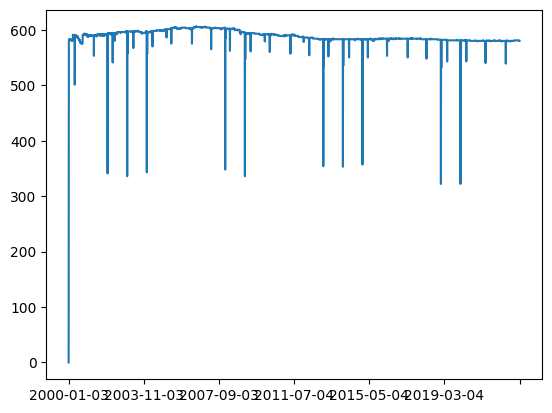

In [48]:
momentum_30days[commmon_columns].where(fitted_mask).notna().sum(axis=1).plot()

In [55]:
to_pass = momentum_30days[commmon_columns].where(fitted_mask).dropna(how='all',axis=0)
to_pass = to_pass.loc[to_pass.notna().sum(axis=1)>11]

In [50]:
to_pass

1COV.DE  1U1.DE     A2.MI  A3M.MC  AAAA.L^C21  AAH.AS^D08  \
2000-01-04       NaN     NaN -0.036678     NaN         NaN   -0.054990   
2000-01-05       NaN     NaN -0.011422     NaN         NaN   -0.025862   
2000-01-06       NaN     NaN  0.030261     NaN         NaN   -0.011947   
2000-01-07       NaN     NaN  0.036849     NaN         NaN    0.011644   
2000-01-10       NaN     NaN -0.038115     NaN         NaN    0.019478   
...              ...     ...       ...     ...         ...         ...   
2022-12-26  0.000000     NaN  0.000000     NaN         NaN         NaN   
2022-12-27  0.012386     NaN -0.000794     NaN         NaN         NaN   
2022-12-28  0.004350     NaN -0.012321     NaN         NaN         NaN   
2022-12-29 -0.001624     NaN  0.020121     NaN         NaN         NaN   
2022-12-30 -0.008948     NaN -0.017751     NaN         NaN         NaN   

              AAK.ST     AAL.L   AALB.AS  AB.L^G07  ...    YAR.OL  YIT.HE  \
2000-01-04       NaN       NaN       NaN       NaN  ...       NaN     NaN   
2000-01-05       NaN       NaN       NaN  0.027070  ...       NaN     NaN   
2000-01-06       NaN       NaN       NaN  0.011550  ...       NaN     NaN   
2000-01-07       NaN       NaN       NaN  0.038866  ...       NaN     NaN   
2000-01-10       NaN       NaN       NaN -0.018869  ...       NaN     NaN   
...              ...       ...       ...       ...  ...       ...     ...   
2022-12-26  0.000000  0.000000  0.000000       NaN  ...  0.000000     NaN   
2022-12-27  0.009393  0.000000 -0.001892       NaN  ...  0.006911     NaN   
2022-12-28  0.005195  0.008021 -0.007042       NaN  ... -0.013821     NaN   
2022-12-29  0.006823 -0.011308  0.010093       NaN  ...  0.006472     NaN   
2022-12-30 -0.011841 -0.005644 -0.021604       NaN  ...  0.000889     NaN   

              YSO.LS   ZALG.DE  ZEL.MC^K15  ZIGGO.AS^L14  ZO1G.DE^A22  \
2000-01-04 -0.074046       NaN         NaN           NaN          NaN   
2000-01-05 -0.024573       NaN         NaN           NaN          NaN   
2000-01-06  0.015158       NaN         NaN           NaN          NaN   
2000-01-07  0.049422       NaN         NaN           NaN          NaN   
2000-01-10  0.025451       NaN         NaN           NaN          NaN   
...              ...       ...         ...           ...          ...   
2022-12-26       NaN  0.000000         NaN           NaN          NaN   
2022-12-27       NaN  0.007961         NaN           NaN          NaN   
2022-12-28       NaN -0.000911         NaN           NaN          NaN   
2022-12-29       NaN  0.041046         NaN           NaN          NaN   
2022-12-30       NaN -0.033002         NaN           NaN          NaN   

            ZODC.PA^C18  ZOT.MC^E22    ZURN.S  
2000-01-04          NaN         NaN       NaN  
2000-01-05          NaN         NaN -0.017151  
2000-01-06          NaN         NaN -0.018067  
2000-01-07          NaN         NaN  0.001459  
2000-01-10          NaN         NaN  0.005953  
...                 ...         ...       ...  
2022-12-26          NaN         NaN  0.000000  
2022-12-27          NaN         NaN  0.006396  
2022-12-28          NaN         NaN -0.000872  
2022-12-29          NaN         NaN  0.004091  
2022-12-30          NaN         NaN -0.018878  

[5999 rows x 1557 columns]

In [56]:
ranked_df = af.rank_data(to_pass,10,'alto')

ValueError: Bin labels must be one fewer than the number of bin edges

In [52]:
deciles_df,i = get_rents_df(ranked_df,precios_df,10)

KeyboardInterrupt: 

In [41]:
i

0.7804020100502512

In [42]:
pl.plot_NAV_absoluto(deciles_df)

In [43]:
pl.plot_sharpe(deciles_df)

In [57]:
df = pd.read_excel('10_acciones_para_hugo.xlsx')

In [64]:
df = df.set_index('Date')

In [66]:
df = df.sort_index()

### Rentabilidad 3 meses - con lag
---

In [93]:
rents3mo = df.pct_change(3,limit=1)
rents3mo = rents3mo.dropna()

In [94]:
ranked_df_3mo = af.rank_data(rents3mo,10,'alto')

In [95]:
deciles_df_3mo, i = get_rents_df(ranked_df_3mo,df,10)

In [98]:
deciles_df_3mo.head(10)

equiponderado   decil_1   decil_2   decil_3   decil_4   decil_5  \
Date                                                                          
2000-06-30       0.024189 -0.021734  0.006098  0.106323 -0.117570  0.134865   
2000-07-31       0.056507  0.041120  0.077575  0.105180  0.077435 -0.013095   
2000-08-31       0.018725  0.097424  0.061453 -0.078695  0.000000 -0.010051   
2000-09-29       0.057767 -0.035655  0.051397  0.107128  0.026658 -0.031862   
2000-10-31       0.020488  0.061835 -0.004361  0.007782 -0.028104  0.166182   
2000-11-30       0.032710 -0.076580  0.234039  0.043640 -0.022560 -0.051200   
2000-12-29      -0.015114 -0.073868  0.013154 -0.076736  0.080469  0.011702   
2001-01-31      -0.005472 -0.079379  0.048157 -0.076553  0.025981  0.017019   
2001-02-28      -0.042639 -0.107702 -0.021655  0.047249 -0.125984  0.078963   
2001-03-30       0.028554  0.055600  0.003331  0.052925  0.057219  0.031900   

             decil_6   decil_7   decil_8   decil_9  decil_10  
Date                                                          
2000-06-30 -0.086725  0.034949  0.138179  0.017232  0.030270  
2000-07-31 -0.017670  0.101284  0.021386  0.066460  0.105397  
2000-08-31 -0.082331  0.113681  0.074081 -0.000292  0.011980  
2000-09-29  0.041861 -0.001591  0.234509  0.044305  0.140921  
2000-10-31  0.006584  0.017131  0.056545 -0.006062 -0.072656  
2000-11-30  0.045030  0.071147 -0.028169  0.093054  0.018696  
2000-12-29 -0.007781 -0.034784  0.024548  0.028075 -0.115921  
2001-01-31 -0.143337  0.054057  0.016890  0.023312  0.059129  
2001-02-28 -0.073422 -0.251494 -0.025507  0.021108  0.032050  
2001-03-30 -0.035910  0.118741  0.051735 -0.006525 -0.043479

In [96]:
pl.plot_NAV_absoluto(deciles_df_3mo)

### Rentabilidad 3 meses
---

In [71]:
rents3mo = df.pct_change(3,limit=1)
rents3mo = rents3mo.dropna()

In [78]:
ranked_df_3mo = af.rank_data(rents3mo,10,'alto')

In [79]:
deciles_df_3mo, i = get_rents_df(ranked_df_3mo,df,10)

In [80]:
pl.plot_NAV_absoluto(deciles_df_3mo)

### pct_change(1)
---

In [81]:
rents1mo = df.pct_change(1,limit=1)
rents1mo = rents1mo.dropna()
ranked_df_1mo = af.rank_data(rents1mo,10,'alto')
deciles_df_1mo, i = get_rents_df(ranked_df_1mo,df,10)
pl.plot_NAV_absoluto(deciles_df_1mo)

### solo precios
---

In [82]:
ranked_df = af.rank_data(df,10,'alto')
deciles_df, i = get_rents_df(ranked_df,df,10)
pl.plot_NAV_absoluto(deciles_df)